In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.model_selection import train_test_split 

In [4]:
n1, n2 = 100, 50
a1, a2 = np.array((-1,-1,-1)), np.array((3,3,3))
r1, r2 = np.array(((4,1,1),(1,2,0.1),(1,0.1,2))), np.array(((4,-1,-1),(-1,2,0.1),(-1,0.1,2)))

In [13]:
data1 = np.random.multivariate_normal(a1,r1,n1)
data2 = np.random.multivariate_normal(a2,r2,n2)
data = np.concatenate((data1,data2))
data1.shape, data2.shape, data.shape
df_normal = pd.DataFrame(data=data, columns=['x','y','z'])
df_normal['class'] = np.random.randint(low=0, high=2, size=n1+n2)

In [16]:
df_normal.head()

,x,y,z,class
0,0.120040,-4.042018,1.357942,0
1,-1.659631,-3.547395,-0.494181,0
2,-6.181502,-3.138246,-2.379330,1
3,-0.181456,-2.100682,-0.418331,0
4,-3.204615,0.451981,0.361123,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_normal[['x','y','z']].values,\
                                                    df_normal['class'].values, test_size=0.5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 3), (75, 3), (75,), (75,))

In [20]:
clf_normal = KNN().fit(X_train, y_train)

In [22]:
clf_normal.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [23]:
y_predict_normal = clf_normal.predict(X_test)

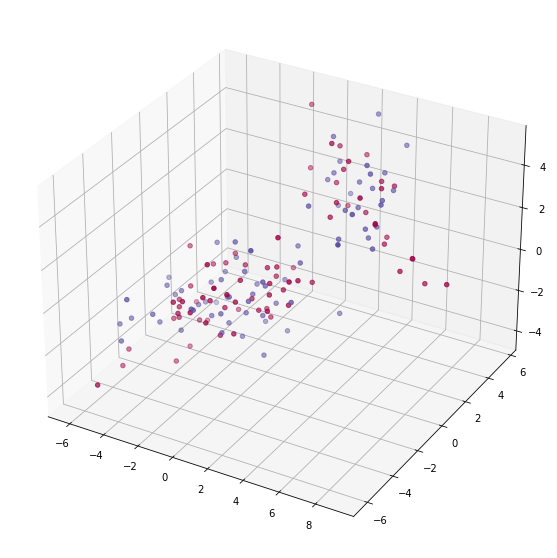

In [44]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_normal.x.values, df_normal.y.values,df_normal.z, c=df_normal['class'].values,\
           cmap=plt.cm.Spectral,)